In [1]:
%load_ext autoreload
%autoreload

In [2]:
from utils_v1 import *


In [3]:
from icecream import ic
import pdb
from sklearn import metrics
import importlib
import utils_v1
import sys
import numpy as np
from src.dataset import (
    MultipleDates,
    PAMultipleDates,
    MTMultipleDates,
    MAMultipleDates,
    MSMultipleDates,
    PIMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates
from src.manager.multioutput import ManagerMCDropout, ManagerSingleRun, ManagerEnsemble, ManagerEvidential2
from src.Logger import Logger


Tensorflow ver. 2.6.0


In [4]:
ic.configureOutput(includeContext=True)

In [5]:
useLessInferenceRuns = False
reducedInferenceRuns = 30

In [6]:
config = {
	"training": True,
	"inferring": True,
	"site": "PA",
	"training_date": "current", # values: earlier, current
	"mode": "single_run", # values: mcd, single_run, ensemble, evidential2
	"uncertainty_method": "pred_entropy_single", # pred_var MI pred_entropy KL pred_entropy_single
	"loadInference": False,
	"removePolygons": True,
	"plotLandsat": False,
	"plotPOI": False,

	"save_probabilities": False,
	"addPastDeforestationInput": True,
	"classes_mode": False,
	"learning_rate": 1e-4,
    "use_cloud_mask": True,
}

In [7]:



if config['mode'] == 'mcd':
	managerClass = ManagerMCDropout
	config['inference_times'] = 10
	config['training_times'] = 1
elif config['mode'] == 'single_run':
	managerClass = ManagerSingleRun
	config['inference_times'] = 1
	config['training_times'] = 1
	config['uncertainty_method'] = 'pred_entropy_single'
elif config['mode'] == 'ensemble':
	managerClass = ManagerEnsemble
	config['inference_times'] = 10
	config['training_times'] = 10
elif config['mode'] == 'evidential2':
	managerClass = ManagerEvidential2
	config['inference_times'] = 1
	config['training_times'] = 1
else:
	raise ValueError('Invalid mode')

print(config)

if config['site'] == 'PA':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2017, 2018]
	else:
		dates = [2018, 2019]
	datasetClass = PAMultipleDates
elif config['site'] == 'MT':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2018, 2019]
	else:
		dates = [2019, 2020]
	datasetClass = MTMultipleDates
elif config['site'] == 'MS':
	dates = [2019, 2020]
	datasetClass = MSMultipleDates
elif config['site'] == 'PI':
	dates = [2019, 2020]
	datasetClass = PIMultipleDates
else:
	raise ValueError('Invalid site')

dataset = datasetClass(config = config,
			   dates = dates, 
	 	addPastDeforestationInput = config['addPastDeforestationInput'],
		borderBuffer = 2)	

if issubclass(type(dataset), MultipleDates):
	patchesHandler = PatchesHandlerMultipleDates(
		dataset)
else:
	patchesHandler = PatchesHandler()



if config['training'] == False:

	if type(dataset) == PAMultipleDates:


		if config['training_date'] == 'current': exp = 0; repetition_id = 0
		elif config['training_date'] == 'earlier': exp = 1; repetition_id = 7
		 
	elif type(dataset) == MTMultipleDates:
		
		if config['training_date'] == 'current': exp = 2; repetition_id = 8
		elif config['training_date'] == 'earlier': exp = 3; repetition_id = 6		

	elif type(dataset) == MSMultipleDates:

		if config['training_date'] == 'current': exp = 4; repetition_id = 0
		elif config['training_date'] == 'earlier': exp = 1; repetition_id = 0		

	elif type(dataset) == MSMultipleDates:

		if config['training_date'] == 'current': exp = 6; repetition_id = 0
		elif config['training_date'] == 'earlier': exp = 1; repetition_id = 0		

else:

	exp = 6
	repetition_id = 0
	
logger = Logger()
manager = managerClass(config, dataset, patchesHandler, logger)
manager.defineExperiment(exp)


{'training': True, 'inferring': True, 'site': 'PA', 'training_date': 'current', 'mode': 'single_run', 'uncertainty_method': 'pred_entropy_single', 'loadInference': False, 'removePolygons': True, 'plotLandsat': False, 'plotPOI': False, 'save_probabilities': False, 'addPastDeforestationInput': True, 'classes_mode': False, 'learning_rate': 0.0001, 'use_cloud_mask': True, 'inference_times': 1, 'training_times': 1}


ic| dataset.py:396 in __init__()- list(self.date_ids): [0]
ic| dataset.py:417 in __init__()
    self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
ic| patchesHandler.py:166 in __init__()- self.input_image_shape: 21
ic| patchesHandler.py:167 in __init__()
    self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


In [8]:
manager.config

{'training': True,
 'inferring': True,
 'site': 'PA',
 'training_date': 'current',
 'mode': 'single_run',
 'uncertainty_method': 'pred_entropy_single',
 'loadInference': False,
 'removePolygons': True,
 'plotLandsat': False,
 'plotPOI': False,
 'save_probabilities': False,
 'addPastDeforestationInput': True,
 'classes_mode': False,
 'learning_rate': 0.0001,
 'use_cloud_mask': True,
 'inference_times': 1,
 'training_times': 1,
 'dropout_training': False}

In [9]:
exp

6

In [10]:
manager.setExperimentPath()
manager.createLogFolders()

In [11]:
# ic(type(dataset), exp, dataset.dates)


In [12]:

manager.loadLabel()

D:/Jorge/datasets/deforestation/PA/deforestation_past_years.tif
Loaded deforestation past years


ic| dataset.py:505 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| dataset.py:508 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| dataset.py:512 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/PA/deforestation_before_2008_PA.tif


ic| dataset.py:516 in loadLabelFromDate()
    np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| dataset.py:518 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| dataset.py:497 in loadLabel()
    label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]


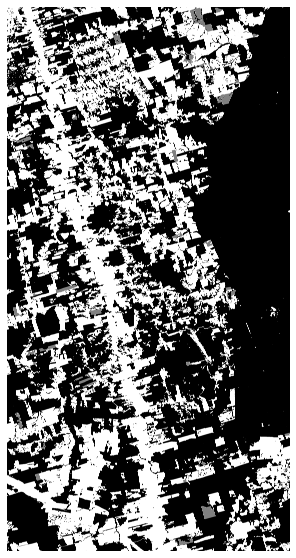

In [13]:
manager.logger.plotFigure(manager.label_mask, 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [14]:

# Creating tile mask
manager.createTrainValTestTiles()


Tiles size:  3546 2300
Mask size:  (17730, 9200)


In [15]:
def get_pixel_count_set(label, mask, set_id):
    label_set = label[mask == set_id]
    return np.unique(label_set, return_counts=True)


In [16]:

np.unique(manager.mask_tiles)
for set_id in np.unique(manager.mask_tiles):
    print('Set', set_id, get_pixel_count_set(manager.label_mask, manager.mask_tiles, set_id))


Set 1 (array([0, 1, 2], dtype=uint8), array([3848933,   24058, 4282809], dtype=int64))
Set 2 (array([0, 1, 2], dtype=uint8), array([3946794,  155444, 4053562], dtype=int64))
Set 3 (array([0, 1, 2], dtype=uint8), array([3763825,  334071, 4057904], dtype=int64))
Set 4 (array([0, 1, 2], dtype=uint8), array([6200673,  140180, 1814947], dtype=int64))
Set 5 (array([0, 1, 2], dtype=uint8), array([3907717,   93438, 4154645], dtype=int64))
Set 6 (array([0, 1, 2], dtype=uint8), array([4353232,   51100, 3751468], dtype=int64))
Set 7 (array([0, 1, 2], dtype=uint8), array([4994674,   64045, 3097081], dtype=int64))
Set 8 (array([0, 2], dtype=uint8), array([8144807,   10993], dtype=int64))
Set 9 (array([0, 1, 2], dtype=uint8), array([5157160,  137968, 2860672], dtype=int64))
Set 10 (array([0, 1, 2], dtype=uint8), array([3475674,   83519, 4596607], dtype=int64))
Set 11 (array([0, 1, 2], dtype=uint8), array([4649101,  107494, 3399205], dtype=int64))
Set 12 (array([0, 1, 2], dtype=uint8), array([7750220

In [17]:

manager.label_mask.dtype

dtype('uint8')

In [18]:

manager.getLabelCurrentDeforestation()

In [19]:

manager.loadInputImage()

ic| dataset.py:445 in loadInputImage()
    image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)


In [20]:

np.unique(manager.image_stack[...,0], return_counts=True)

(array([0.        , 0.08333334, 0.16666667, 0.25      , 0.33333334,
        0.4166667 , 0.5       , 0.5833334 , 0.6666667 , 0.75      ,
        0.8333334 , 0.9166667 , 1.        ], dtype=float32),
 array([104050616,   2209014,    644713,    968315,   1458862,   1560879,
          2477424,   1299508,    903419,    864429,   4570932,   3150455,
         38957434], dtype=int64))

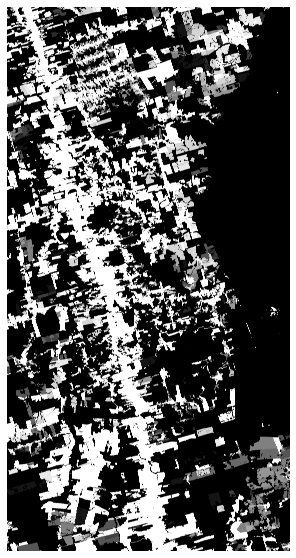

In [21]:

manager.logger.plotFigure(manager.image_stack[...,0], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

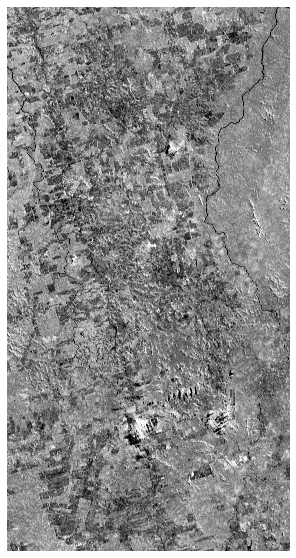

In [22]:

manager.logger.plotFigure(manager.image_stack[...,8], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [23]:
np.unique(manager.label_mask, return_counts=True)

(array([0, 1, 2], dtype=uint8),
 array([100903598,   1838508,  60373894], dtype=int64))

In [24]:
# manager.maskNoDataAsNotConsideredClass()

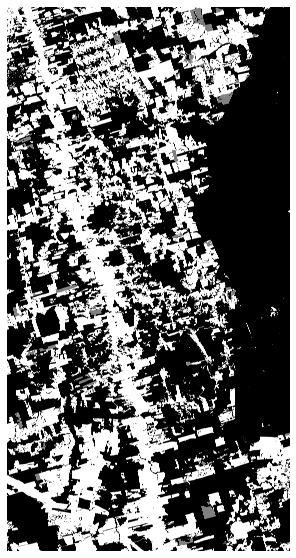

In [25]:

manager.logger.plotFigure(manager.label_mask, 
    name='label_mask', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [26]:

manager.getImageChannels()

ic| base.py:103 in getImageChannels()
    self.image_stack.shape: (17730, 9200, 21)
ic| base.py:105 in getImageChannels()- self.channels: 21


In [27]:

manager.getTrainValTestMasks()

Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]


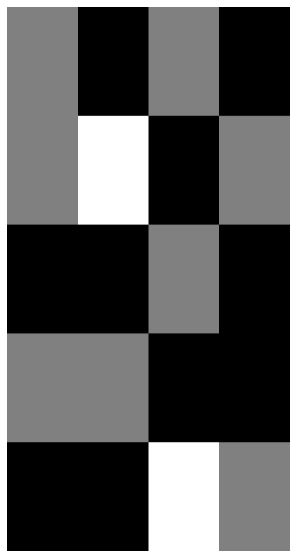

In [28]:
manager.logger.plotFigure(manager.mask_tr_val, 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))


In [29]:

train_unique = get_pixel_count_set(manager.label_mask, manager.mask_tr_val, 1)
val_unique = get_pixel_count_set(manager.label_mask, manager.mask_tr_val, 2)
test_unique = get_pixel_count_set(manager.label_mask, manager.mask_tr_val, 0)

total_unique = np.unique(manager.label_mask, return_counts=True)

In [30]:
print("train unique", train_unique)
print("val unique", val_unique)
print("test unique", test_unique)

print("total unique", total_unique)


train unique (array([0, 1, 2], dtype=uint8), array([38253046,   801988, 26191366], dtype=int64))
val unique (array([0, 1, 2], dtype=uint8), array([9179787,  270914, 6860899], dtype=int64))
test unique (array([0, 1, 2], dtype=uint8), array([53470765,   765606, 27321629], dtype=int64))
total unique (array([0, 1, 2], dtype=uint8), array([100903598,   1838508,  60373894], dtype=int64))


In [31]:
print("train unique percentage", np.round(train_unique[1]/np.sum(train_unique[1]), 3))
print("val unique", np.round(val_unique[1]/np.sum(val_unique[1]), 3))
print("test unique", np.round(test_unique[1]/np.sum(test_unique[1]), 3))

train unique percentage [0.586 0.012 0.401]
val unique [0.563 0.017 0.421]
test unique [0.656 0.009 0.335]


In [32]:

if config["training"] == True:
    # Extracting patches from the idx matrix
    manager.createIdxImage()


ic| patchesHandler.py:25 in create_idx_image()
    im_idx_row.shape: (17730, 9200, 1)
    im_idx_col.shape: (17730, 9200, 1)
ic| patchesHandler.py:26 in create_idx_image()
    im_idx_row.dtype: dtype('uint16')
    im_idx_col.dtype: dtype('uint16')
ic| patchesHandler.py:32 in create_idx_image()
    im_idx.shape: (17730, 9200, 2)
    im_idx.dtype: dtype('uint16')


In [33]:
if config["training"] == True:
    manager.extractCoords()

ic| patchesHandler.py:44 in extract_patches()
    coords.shape: (464, 239, 1, 128, 128, 2)
    coords.dtype: dtype('uint16')
ic| patchesHandler.py:48 in extract_patches()
    coords.shape: (110896, 2)
    coords.dtype: dtype('uint16')


In [34]:
if config["training"] == True:
    manager.trainTestSplit()

ic| base.py:121 in trainTestSplit()
    self.coords_train.shape: (41812, 3)
    self.coords_val.shape: (10260, 3)


In [35]:
if config["training"] == True:
    manager.label_mask.shape

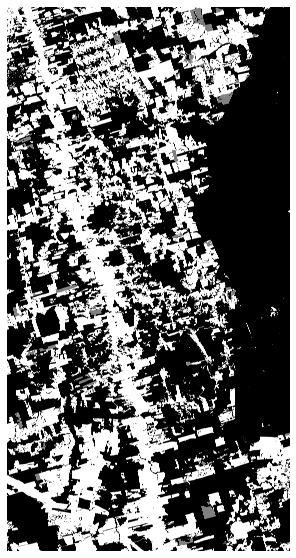

In [36]:
if config["training"] == True:

    manager.logger.plotFigure(manager.label_mask[...,-1], 
        name='Reference', cmap=plt.cm.gray, savefig=False)



In [37]:
if config["training"] == True:
    np.unique(manager.label_mask)

In [38]:
if config["training"] == True:
    print(manager.coords_train)

[[    0     0     0]
 [    0    38     0]
 [    0    76     0]
 ...
 [17594  8968     0]
 [17594  9006     0]
 [17594  9044     0]]


In [39]:
if config["training"] == True:
    manager.retrieveSamplesOfInterest()

training samples:  (3753, 3) validation samples:  (1032, 3)


In [40]:
if config["training"] == True:
    inputSnipShow = True

In [41]:
# count, unique = np.unique(label_mask, return_counts=True)
# print(count, unique)
# print(unique[1]/unique[0])

In [42]:
'''
count, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [43]:
'''
count, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [44]:
manager.dataset.image_channels

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]

In [45]:
manager.dataset.bands

10

ic

[2280 4750    0]
coord [2280 4750    0]
image_patch.shape (17730, 9200, 1)
reference_patch.shape (17730, 9200, 21)


| Logger.py:38 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.29747355
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.3196338


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


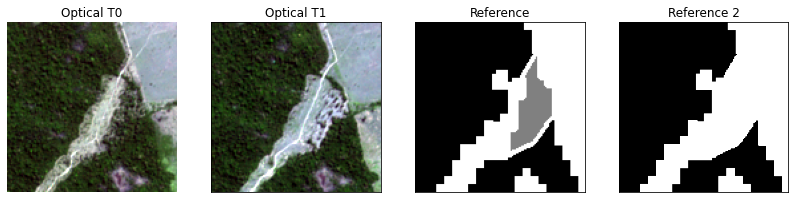

In [46]:
if config["training"] == True:
    if inputSnipShow == True:
        manager.snipDataset(idx = 1000)


ic| Logger.py:38 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.2714837
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.30292988
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 114 5928    0]
coord [ 114 5928    0]
image_patch.shape (17730, 9200, 1)
reference_patch.shape (17730, 9200, 21)


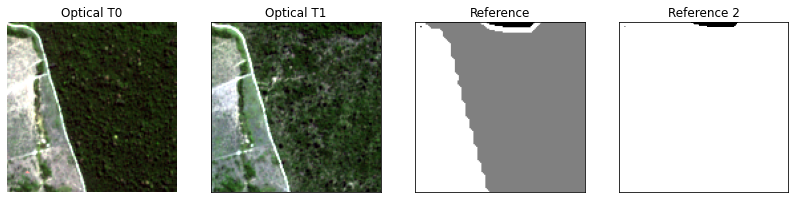

In [47]:
if config["training"] == True:
    if inputSnipShow == True:
        manager.snipDataset(idx = 97)


ic| Logger.py:38 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.44512972
    np.mean(image_patch[...,dataset.previewBandsSnip[1]

[ 874 1026    0]
coord [ 874 1026    0]
image_patch.shape (17730, 9200, 1)
reference_patch.shape (17730, 9200, 21)


]): 0.45241854
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


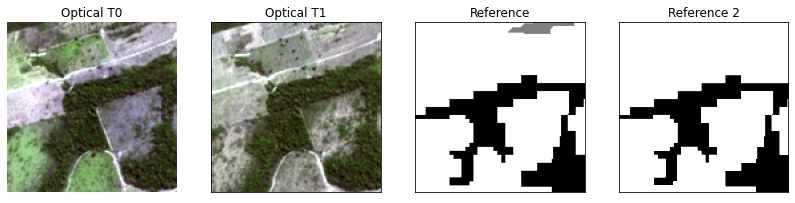

In [48]:
if config["training"] == True:
    if inputSnipShow == True:

        manager.snipDataset(idx = 500)

ic| Logger.py:38 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.09604081
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.23388559


[ 608 6574    0]
coord [ 608 6574    0]
image_patch.shape (17730, 9200, 1)
reference_patch.shape (17730, 9200, 21)


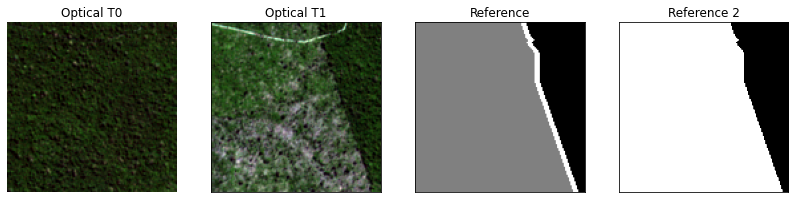

In [49]:
if config["training"] == True:
    if inputSnipShow == True:

        manager.snipDataset(idx = 400)

ic| Logger.py:38 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.09604081
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.23388559


[ 608 6574    0]
coord [ 608 6574    0]
image_patch.shape (17730, 9200, 1)
reference_patch.shape (17730, 9200, 21)


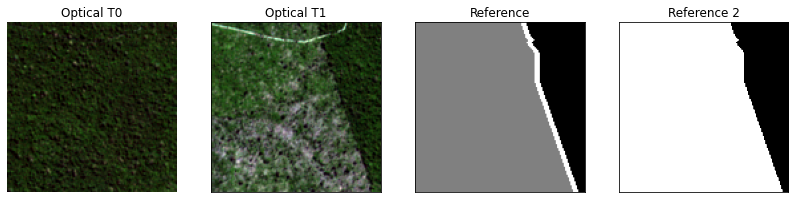

In [50]:
if config["training"] == True:
    if inputSnipShow == True:

        manager.snipDataset(idx = 400)

In [51]:
if config["training"] == True:
    manager.getGenerators()


In [52]:
if config["training"] == True:
    manager.fixChannelNumber()

In [53]:
if config["training"] == True:
    print(manager.path_exp)

D:/Jorge/datasets/deforestation/experiments/PA/exp6


In [54]:
if config["training"] == True:
    print(manager.channels)

21


In [55]:
if config["training"] == True:
    print(manager.image_stack.shape)

(17730, 9200, 21)


In [56]:
if config["training"] == True:
    print("config['training_times']", config["training_times"])

config['training_times'] 1


In [ ]:
if config["training"] == True:
    for tm in range(config['training_times']):
        manager.repetition_id = tm
        manager.train()

time:  0


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_enc_net (InputLayer)      [(None, 128, 128, 21 0                                            
__________________________________________________________________________________________________
res1_net1 (Conv2D)              (None, 128, 128, 16) 3040        input_enc_net[0][0]              
__________________________________________________________________________________________________
drop_net1 (SpatialDropout2D)    (None, 128, 128, 16) 0           res1_net1[0][0]                  
__________________________________________________________________________________________________
res2_net1 (Conv2D)              (None, 128, 128, 16) 2320        drop_net1[0][0]                  
______________________________________________________________________________________________

c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\engine\training.py:1969: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


K.int_shape(y_pred) (None, 128, 128, 3)
K.int_shape(y_true) (None, None, None, None)
K.int_shape(loss) (None, 128, 128, 3)
K.int_shape(weights) (3,)
K.int_shape(loss) (None, 128, 128, 3)
K.int_shape(loss) (None, 128, 128)
K.int_shape(y_pred) (None, 128, 128, 3)
K.int_shape(y_true) (None, None, None, None)
K.int_shape(loss) (None, 128, 128, 3)
K.int_shape(weights) (3,)
K.int_shape(loss) (None, 128, 128, 3)
K.int_shape(loss) (None, 128, 128)
351/351 [==============================] - ETA: 0s - loss: 0.1015 - accuracy: 0.7107K.int_shape(y_pred) (None, 128, 128, 3)
K.int_shape(y_true) (None, None, None, None)
K.int_shape(loss) (None, 128, 128, 3)
K.int_shape(weights) (3,)
K.int_shape(loss) (None, 128, 128, 3)
K.int_shape(loss) (None, 128, 128)
351/351 [==============================] - 39s 97ms/step - loss: 0.1015 - accuracy: 0.7107 - val_loss: 0.0651 - val_accuracy: 0.8698

Epoch 00001: val_loss improved from inf to 0.06513, saving model to D:/Jorge/datasets/deforestation/experiments/PA/e

c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


351/351 [==============================] - 32s 92ms/step - loss: 0.0604 - accuracy: 0.8699 - val_loss: 0.0516 - val_accuracy: 0.8919

Epoch 00002: val_loss improved from 0.06513 to 0.05164, saving model to D:/Jorge/datasets/deforestation/experiments/PA/exp6/models\resunet_0.h5
Epoch 3/100
351/351 [==============================] - 33s 93ms/step - loss: 0.0528 - accuracy: 0.8886 - val_loss: 0.0497 - val_accuracy: 0.8995

Epoch 00003: val_loss improved from 0.05164 to 0.04972, saving model to D:/Jorge/datasets/deforestation/experiments/PA/exp6/models\resunet_0.h5
Epoch 4/100
351/351 [==============================] - 33s 94ms/step - loss: 0.0476 - accuracy: 0.9007 - val_loss: 0.0507 - val_accuracy: 0.9054

Epoch 00004: val_loss did not improve from 0.04972
Epoch 5/100
351/351 [==============================] - 32s 92ms/step - loss: 0.0449 - accuracy: 0.9065 - val_loss: 0.0544 - val_accuracy: 0.9017

Epoch 00005: val_loss did not improve from 0.04972
Epoch 6/100
177/351 [==============>..

198/351 [===============>..............] - ETA: 11s - loss: 0.0438 - accuracy: 0.9095

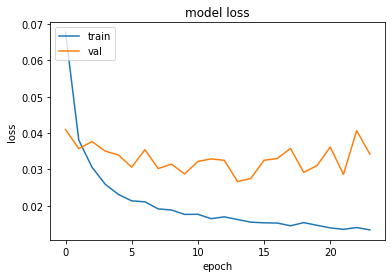

In [ ]:
if config["training"] == True:
    manager.plotHistory()


In [ ]:
repetition_id = 0

In [ ]:
if config["inferring"] != True:
    sys.exit()
else:
    manager.repetition_id = repetition_id

In [ ]:
manager.image_stack.shape

(19355, 20840, 9)

In [ ]:
manager.patchesHandler.dataset.image_channels[-1]

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [ ]:
if issubclass(type(dataset), MultipleDates):
	manager.channels = manager.patchesHandler.input_image_shape
	manager.image_stack = manager.image_stack[..., manager.patchesHandler.dataset.image_channels[-1]]
	manager.label_mask = manager.label_mask[...,-1]


In [ ]:
manager.image_stack.shape

(19355, 20840, 9)

In [ ]:
manager.setPadding()

-5.0 -24.0


In [ ]:
manager.infer()

time:  0
time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9


In [ ]:
manager.loadPredictedProbabilities()

In [ ]:
manager.prob_rec.shape

(19360, 20864, 10)

In [ ]:
'''
if useLessInferenceRuns == True:
    ic(reducedInferenceRuns)

    prob_rec_all = prob_rec.copy()
    prob_rec = prob_rec_all[:reducedInferenceRuns]
    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))
'''

'\nif useLessInferenceRuns == True:\n    ic(reducedInferenceRuns)\n\n    prob_rec_all = prob_rec.copy()\n    prob_rec = prob_rec_all[:reducedInferenceRuns]\n    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))\n'

In [ ]:
manager.prob_rec.shape

(19360, 20864, 10)

In [ ]:
manager.getMeanProb()

In [ ]:
manager.logger.getStats(manager.mean_prob)

ic| Logger.py:119 in getStats()
    np.min(value): 1.8719625e-14
    np.mean(value): 0.017560305
    np.max(value): 1.0


In [ ]:
ic(manager.mean_prob.shape)

ic| 3681128488.py:1 in <cell line: 1>()
    trainer.mean_prob.shape: (19360, 20864)


(19360, 20864)

In [ ]:
manager.unpadMeanProb()

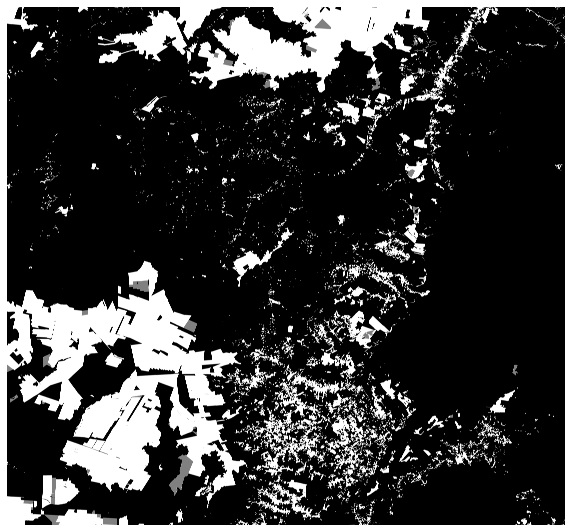

In [ ]:
manager.logger.plotFigure(manager.label_mask, 
            name='Reference mask', figsize=(10,10), cmap=plt.cm.gray, savefig=True)

In [ ]:
manager.squeezeLabel()

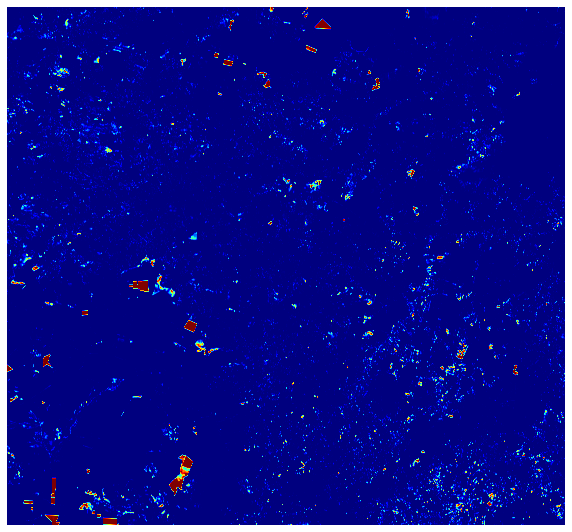

In [ ]:
manager.setMeanProbNotConsideredAreas()
manager.logger.plotFigure(manager.mean_prob, 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

In [ ]:
print(manager.label_mask.shape)

(19355, 20840)


In [ ]:
# manager.getLabelTest()

In [ ]:
# manager.getMAP()

In [ ]:
manager.prob_rec.shape

(19360, 20864, 10)

In [ ]:
manager.preprocessProbRec()
print(manager.prob_rec.shape)

(10, 19360, 20864, 1)


In [ ]:
manager.prob_rec.shape

(10, 19360, 20864, 1)

In [ ]:
manager.logger.getStats(manager.prob_rec)

ic| Logger.py:119 in getStats()
    np.min(value): 7.062184e-29
    np.mean(value): 0.017554954
    np.max(value): 1.0


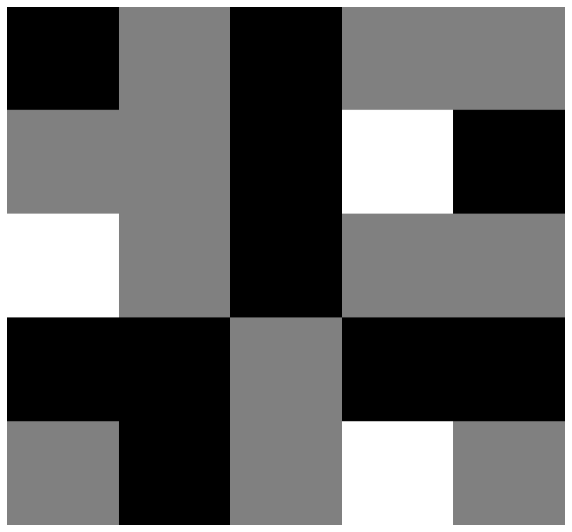

In [ ]:
manager.logger.plotFigure(manager.mask_tr_val, 
            name=manager.dataset.site + manager.title_name + ' Train val mask.png', figsize=(10,10), savefig=False)

In [ ]:
manager.getLabelCurrentDeforestation()

In [ ]:
manager.applyProbabilityThreshold()

(19355, 20840)
(array([0., 1.], dtype=float32), array([398729225,   4628975], dtype=int64))


ic| base.py:395 in applyProbabilityThreshold()
    self.predicted_unpad.shape: (19355, 20840)
    self.predicted.shape: (19355, 20840)


In [ ]:
manager.getTestValues()

ic| base.py:418 in getTestValues()- predicted_test.shape: (161343280,)
ic| base.py:427 in getTestValues()- predicted_test.shape: (122722628,)


In [ ]:
manager.removeSmallPolygons()

ic| metrics.py:213 in removeSmallPolygonsForMetrics()
    np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([398729225,   4628975], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([399058722,   4299478], dtype=int64))
ic| metrics.py:215 in removeSmallPolygonsForMetrics()
    np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([403028703,    329497], dtype=int64))


In [ ]:
manager.calculateMetrics()

ic| base.py:471 in calculateMetrics()
    self.f1: 69.73
    self.precision: 57.44
    self.recall: 88.69


In [ ]:
manager.getValidationValuesForMetrics()
manager.calculateMetricsValidation()

ic| base.py:400 in getValidationValuesForMetrics()
    self.label_mask_val.shape: (48402984,)
ic| base.py:406 in getValidationValuesForMetrics()
    self.label_mask_val_valid.shape: (42343348,)
ic| base.py:482 in calculateMetricsValidation()
    f1_val: 44.32
    precision_val: 31.16
    recall_val: 76.72
    mAP_val: 49.64


In [ ]:
calculateMAPWithoutSmallPolygons = False
if calculateMAPWithoutSmallPolygons == True:
    manager.calculateMAPWithoutSmallPolygons()

In [ ]:
manager.get_label_no_buffer()

D:/Jorge/datasets/deforestation/PI/deforestation_past_years.tif
Loaded deforestation past years


ic| dataset.py:505 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([340580606,   4312043,   6953620,   5659916,   7162776,   6261432,
                                                                      8191420,   3233962,   3270293,   3044419,   1817289,   2359424,
                                                                      2201926,   3050229,   2901307,   2418575], dtype=int64))


Label where deforestation past years is actual date (2020) = 1


ic| dataset.py:508 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([340580606,   4312043,   6953620,   5659916,   7162776,   6261432,
                                                                      8191420,   3233962,   3270293,   3044419,   1817289,   2359424,
                                                                      2201926,   3050229,   2901307,   2418575], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| dataset.py:512 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([340580606,   4312043,   6953620,   5659916,   7162776,   6261432,
                                                                      8191420,   3233962,   3270293,   3044419,   1817289,   2359424,
                                                                      2201926,   3050229,   2901307,   2418575], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/PI/deforestation_before_2000_PI.tif


ic| dataset.py:516 in loadLabelFromDate()
    np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 208], dtype=uint8), array([385251297,  18167940], dtype=int64))
ic| dataset.py:518 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([340580606,   4312043,   6953620,   5659916,   7162776,   6261432,
                                                                      8191420,   3233962,   3270293,   3044419,   1817289,   2359424,
                                                                      2201926,   3050229,   2901307,   2418575], dtype=int64))
ic| dataset.py:497 in loadLabel()
    label_per_date.shape: (19357, 20841, 1)


In [ ]:
manager.getErrorMask()

(array([0., 1.], dtype=float32), array([401012724,   2345476], dtype=int64))


In [ ]:
manager.getErrorMaskToShowRGB()

[0. 1.]


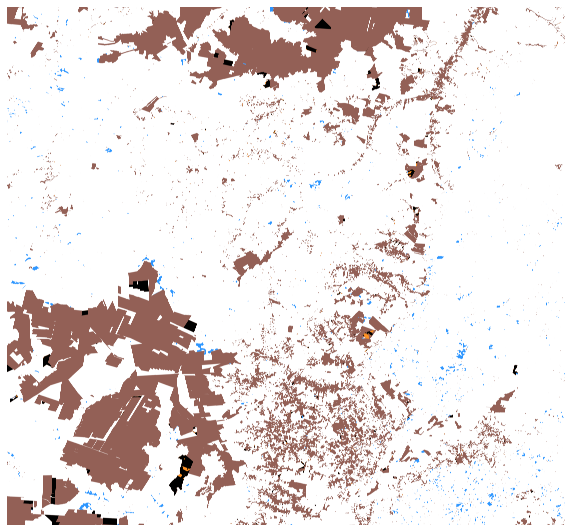

In [ ]:
manager.logger.plotFigure(manager.error_mask_to_show_rgb[...,::-1], 
            name=manager.dataset.site + manager.title_name + ' error mask color.png', 
            figsize=(10,10), savefig=True, dpi=300)

In [ ]:
'''
import types

manager.setUncertainty = types.MethodType(setUncertainty, manager)
'''


'\nimport types\n\ntrainer.setUncertainty = types.MethodType(setUncertainty, trainer)\n'

In [ ]:
manager.setUncertainty()

K = 1, pred_mean shape (19360, 20864, 1)


In [ ]:
manager.uncertainty_map[manager.uncertainty_map>1] = 1

In [ ]:
manager.logger.getStats(manager.uncertainty_map)

ic| Logger.py:119 in getStats()
    np.min(value): -0.0
    np.mean(value): 0.01700791
    np.max(value): 0.36787948


In [ ]:
manager.getUncertaintyToShow()
manager.logger.getStats(manager.uncertainty_to_show)


ic| Logger.py:119 in getStats()
    np.min(value): 0.0
    np.mean(value): 0.01639131
    np.max(value): 0.36787948


ic| 2250769769.py:4 in <cell line: 4>()
    trainer.uncertainty_to_show.shape: (19355, 20840)


(19355, 20840)

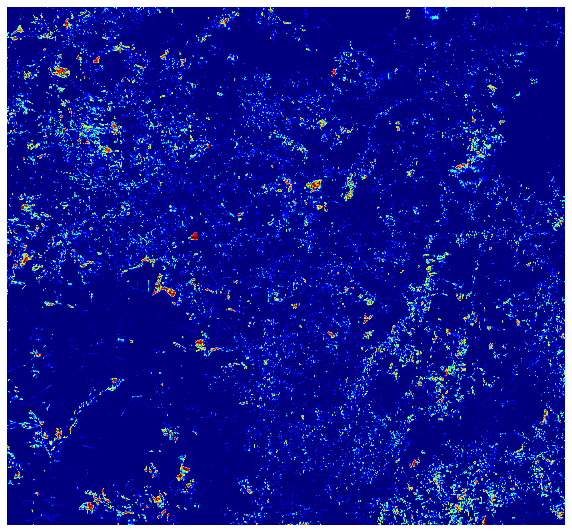

In [ ]:

manager.logger.plotFigure(manager.uncertainty_to_show, 
            name=manager.dataset.site + manager.title_name + ' uncertainty '+manager.config['uncertainty_method']+'.png', figsize=(10,10), cmap='jet', savefig=True)

ic(manager.uncertainty_to_show.shape)



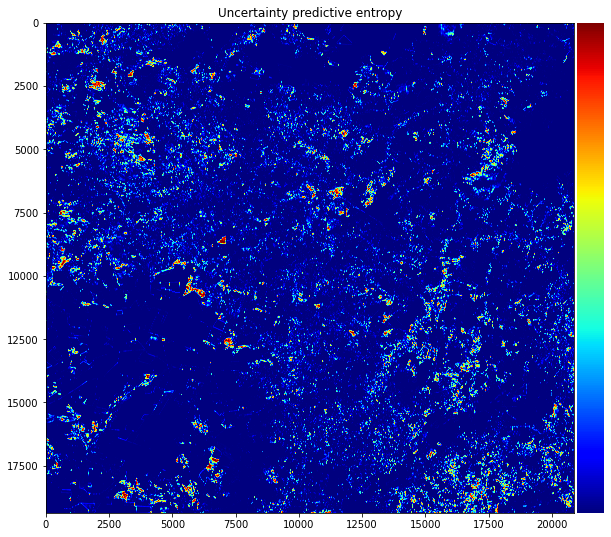

In [ ]:

import src.uncertainty
fig, ax = plt.subplots(1,1,figsize=(10,10))
src.uncertainty.show_im(manager.uncertainty_map, ax, title = 'Uncertainty predictive entropy')
plt.axis('off')
plt.savefig('output/figures/Para' + manager.title_name + ' uncertainty '+manager.config['uncertainty_method']+'.png', 
    dpi=150, bbox_inches='tight')

In [ ]:
manager.getValidationValues2()
manager.getTestValues2()

ic| base.py:522 in getTestValues2()
    self.label_mask.shape: (19355, 20840)
ic| base.py:523 in getTestValues2()
    self.mask_amazon_ts.shape: (19355, 20840)
ic| base.py:527 in getTestValues2()
    self.label_mask_test.shape: (161343280,)
ic| base.py:535 in getTestValues2()
    self.error_mask_test.shape: (122611381,)


ic| Logger.py:163 in plotCropSample()
    trainer.dataset.previewLims1: array([11500, 12500,  9000, 10000])
    trainer.dataset.previewLims2: array([ 5000,  6000,  9500, 10500])
ic| Logger.py:165 in plotCropSample()
    np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([0, 1], dtype=uint8)
ic| Logger.py:167 in plotCropSample()
    np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))


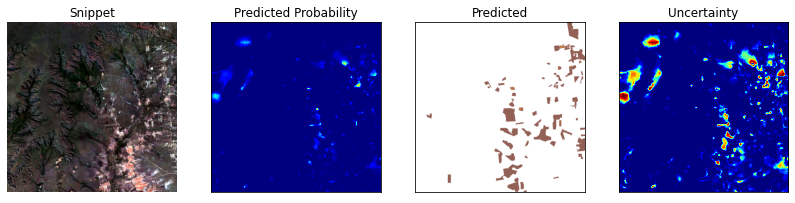

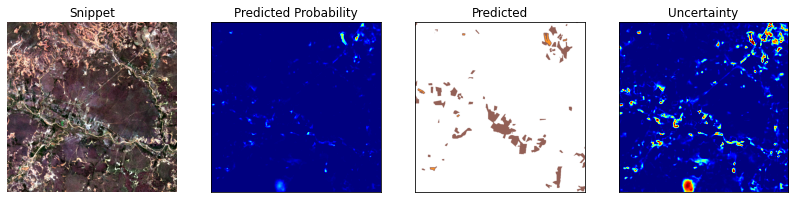

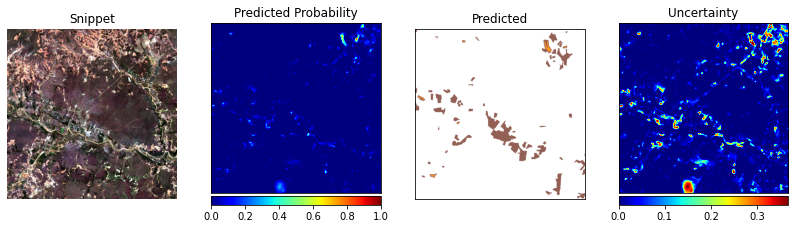

In [ ]:
manager.logger.plotCropSample(manager)

In [ ]:
if config["plotLandsat"] == True:
    label_tmp_dates = []
    for date in dataset.prodes_dates:
        label_tmp_date = dataset.loadLabelFromDate(date)
        label_tmp_date = label_tmp_date[:manager.mask_tiles.shape[0], :manager.mask_tiles.shape[1]]
        label_tmp_dates.append(label_tmp_date)

In [ ]:
if config["plotLandsat"] == True:
    # del manager.image_stack
    import src.lansdatLoader as ll
    import importlib
    importlib.reload(ll)
    landsatLoader = ll.LandsatLoader(dataset)
    ims = landsatLoader.load()
    for idx in range(len(ims)):
        ims[idx] = ims[idx][:manager.mask_tiles.shape[0], :manager.mask_tiles.shape[1],:]
    ims = landsatLoader.darken_past_deforestation(ims, manager.label_no_buffer)
    ims = landsatLoader.add_deforestation_edges_by_date(ims, label_tmp_dates[:])

In [ ]:
if config["plotLandsat"] == True:
    logger.plotCropSampleLandsat(manager, ims)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


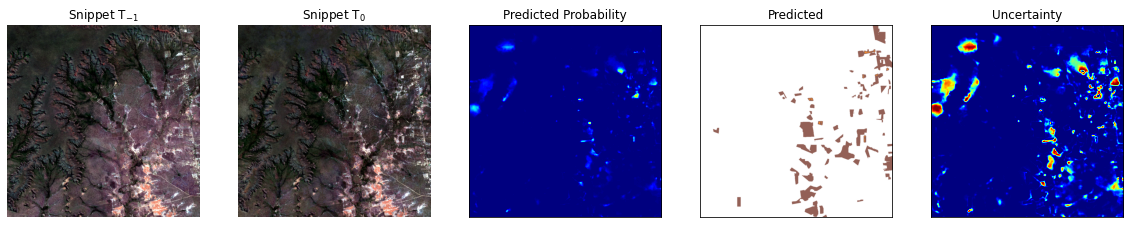

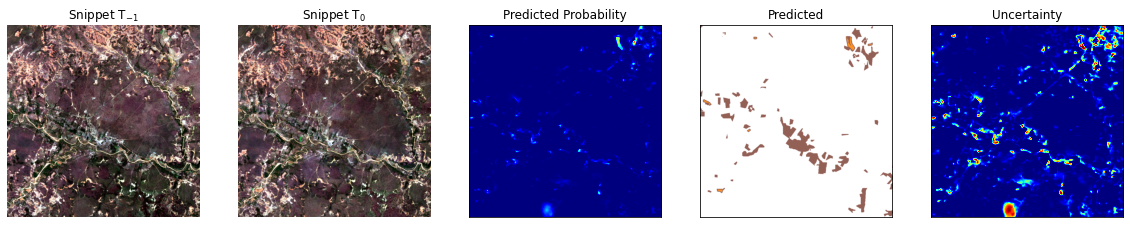

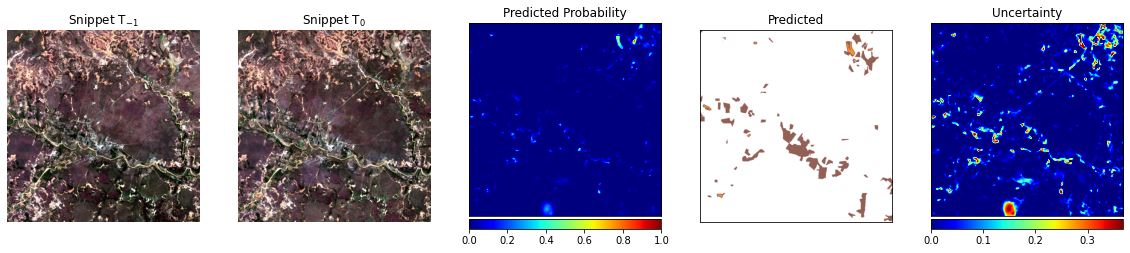

In [ ]:
manager.logger.plotCropSampleT0T1(manager)

In [ ]:
manager.logger.getStats(manager.uncertainty)


ic| Logger.py:119 in getStats()
    np.min(value): -0.0
    np.mean(value): 0.020458464
    np.max(value): 0.36787948


In [ ]:
'''
manager.getOtherUncertaintyMetrics()
print(manager.sUEO)

print(manager.ece_score)  
'''

'\ntrainer.getOtherUncertaintyMetrics()\nprint(trainer.sUEO)\n\nprint(trainer.ece_score)  \n'

In [ ]:
if config["plotPOI"] == True and config['site'] == 'PA':

    print(manager.mean_prob.shape)
    font = {'family': "Times New Roman",
            'color':  'white',
            'weight': 'bold',
            'size': 24,
            }

    lims = dataset.previewLims1
    im = manager.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]
    plt.figure(figsize=(10,10))
    plt.imshow(im, cmap='jet')

    letters = ['A', 'B', 'C', 'D', 'E', 'F']

    for poi_id in range(4):
            
            plt.text(manager.dataset.snippet_coords['snippet_id0'][poi_id][1], 
                    manager.dataset.snippet_coords['snippet_id0'][poi_id][0], 
                    letters[poi_id], fontdict=font)
    plt.axis('off')

    plt.savefig(os.path.join('output/pdf_plot_results', 
                            'pdf_plot_poi0.png'), 
    dpi=150, bbox_inches='tight')

    lims = dataset.previewLims2
    im = manager.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]
    plt.figure(figsize=(10,10))
    plt.imshow(im, cmap='jet')

    letters = ['E', 'F']

    print(manager.dataset.snippet_coords['snippet_id1'])
    for poi_id in range(2):
            
            plt.text(manager.dataset.snippet_coords['snippet_id1'][poi_id][1], 
                    manager.dataset.snippet_coords['snippet_id1'][poi_id][0], 
                    letters[poi_id], fontdict=font)
    plt.axis('off')
            
    plt.savefig(os.path.join('output/pdf_plot_results', 
                            'pdf_plot_poi1.png'), 
    dpi=150, bbox_inches='tight')

In [ ]:
if config["plotPOI"] == True and config['site'] == 'PA':
    manager.getPOIValues()


In [ ]:

if config["plotPOI"] == True and config['site'] == 'PA':
    import pickle
    with open('output/log/log_ensemble_.pkl', 'wb') as f:
                pickle.dump(manager.snippet_poi_results, f)


In [ ]:
from src import metrics as _metrics



In [ ]:

import types

manager.getUncertaintyAAValues = types.MethodType(getUncertaintyAAValues, manager)



Get precision-recall threshold

In [ ]:

manager.getUncertaintyAAValues()

ic| 810240186.py:62 in getUncertaintyAAValues()
    self.uncertainty.shape: (122611381,)
    self.label_mask_current_deforestation_test.shape: (122611381,)


[0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 0.25, 0.27, 0.3, 0.34, 0.36, 0.3648794801235199, 0.3663794801235199]
threshold 0.0025


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (30491466,)
    predicted_test_classified_incorrect.shape: (30491466,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 30491466
    len(label_mask_current_deforestation_test): 122611381
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 30491466
    len(label_mask_current_deforestation_test): 122611381


[0.94868191 0.99912338 0.59565744 0.24868382 0.31791761 0.72125592
 0.03174739]
threshold 0.005


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (25726010,)
    predicted_test_classified_incorrect.shape: (25726010,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 25726010
    len(label_mask_current_deforestation_test): 122611381
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 25726010
    len(label_mask_current_deforestation_test): 122611381


[0.93083654 0.99844036 0.61556807 0.20981747 0.30740062 0.7076085
 0.03688026]
threshold 0.0075


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (23079033,)
    predicted_test_classified_incorrect.shape: (23079033,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 23079033
    len(label_mask_current_deforestation_test): 122611381
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 23079033
    len(label_mask_current_deforestation_test): 122611381


[0.92067998 0.99779397 0.62760513 0.18822913 0.30070317 0.69893459
 0.04058119]
threshold 0.01


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (21250976,)
    predicted_test_classified_incorrect.shape: (21250976,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 21250976
    len(label_mask_current_deforestation_test): 122611381
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 21250976
    len(label_mask_current_deforestation_test): 122611381


[0.91260505 0.99727855 0.63615499 0.17331977 0.296076   0.69249855
 0.04359702]
threshold 0.015


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (18757211,)
    predicted_test_classified_incorrect.shape: (18757211,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 18757211
    len(label_mask_current_deforestation_test): 122611381
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 18757211
    len(label_mask_current_deforestation_test): 122611381


[0.90165478 0.99639693 0.64837158 0.15298099 0.2891681  0.68294994
 0.04860646]
threshold 0.025


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (15743995,)
    predicted_test_classified_incorrect.shape: (15743995,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 15743995
    len(label_mask_current_deforestation_test): 122611381
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 15743995
    len(label_mask_current_deforestation_test): 122611381


[0.88802261 0.99499242 0.66493271 0.12840566 0.27913818 0.66918393
 0.05661384]
threshold 0.05


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (11847193,)
    predicted_test_classified_incorrect.shape: (11847193,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 11847193
    len(label_mask_current_deforestation_test): 122611381
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 11847193
    len(label_mask_current_deforestation_test): 122611381


[0.86183656 0.99174855 0.69260432 0.09662393 0.26244617 0.64419527
 0.07157093]
threshold 0.08


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (9424401,)
    predicted_test_classified_incorrect.shape: (9424401,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 9424401
    len(label_mask_current_deforestation_test): 122611381
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 9424401
    len(label_mask_current_deforestation_test): 122611381


[0.8325052  0.98785461 0.71669441 0.076864   0.24917678 0.62012477
 0.08428667]
threshold 0.1


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (8320257,)
    predicted_test_classified_incorrect.shape: (8320257,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 8320257
    len(label_mask_current_deforestation_test): 122611381
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 8320257
    len(label_mask_current_deforestation_test): 122611381


[0.81675319 0.9859125  0.7406179  0.06785877 0.22958012 0.58801173
 0.09121149]
threshold 0.15


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (6370334,)
    predicted_test_classified_incorrect.shape: (6370334,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 6370334
    len(label_mask_current_deforestation_test): 122611381
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 6370334
    len(label_mask_current_deforestation_test): 122611381


[0.77521843 0.98094642 0.77053595 0.05195549 0.21157484 0.54256602
 0.1045923 ]
threshold 0.2


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (4891028,)
    predicted_test_classified_incorrect.shape: (4891028,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 4891028
    len(label_mask_current_deforestation_test): 122611381
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 4891028
    len(label_mask_current_deforestation_test): 122611381


[0.73725174 0.9754333  0.80527172 0.03989049 0.18072301 0.46801125
 0.11492456]
threshold 0.225


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (4268081,)
    predicted_test_classified_incorrect.shape: (4268081,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 4268081
    len(label_mask_current_deforestation_test): 122611381
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 4268081
    len(label_mask_current_deforestation_test): 122611381


[0.71788543 0.97274631 0.81926462 0.03480983 0.16794966 0.42875877
 0.11840462]
threshold 0.25


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (3673407,)
    predicted_test_classified_incorrect.shape: (3673407,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3673407
    len(label_mask_current_deforestation_test): 122611381
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3673407
    len(label_mask_current_deforestation_test): 122611381


[0.69548468 0.96994074 0.83064592 0.02995976 0.16091606 0.39181379
 0.11958645]
threshold 0.27


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (3221764,)
    predicted_test_classified_incorrect.shape: (3221764,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3221764
    len(label_mask_current_deforestation_test): 122611381
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3221764
    len(label_mask_current_deforestation_test): 122611381


[0.67567205 0.9675466  0.84018093 0.02627622 0.15549706 0.35501991
 0.11751283]
threshold 0.3


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (2546616,)
    predicted_test_classified_incorrect.shape: (2546616,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2546616
    len(label_mask_current_deforestation_test): 122611381
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2546616
    len(label_mask_current_deforestation_test): 122611381


[0.63981394 0.96332058 0.85551272 0.02076982 0.15178    0.28059574
 0.10442727]
threshold 0.34


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1542012,)
    predicted_test_classified_incorrect.shape: (1542012,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1542012
    len(label_mask_current_deforestation_test): 122611381
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1542012
    len(label_mask_current_deforestation_test): 122611381


[0.58473917 0.95556077 0.88235285 0.01257642 0.1301517  0.05954781
 0.05570714]
threshold 0.36


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (812868,)
    predicted_test_classified_incorrect.shape: (812868,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 812868
    len(label_mask_current_deforestation_test): 122611381
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 812868
    len(label_mask_current_deforestation_test): 122611381


[0.57441916 0.93318952 0.88691496 0.00662963        nan 0.
 0.03703388]
threshold 0.3648794801235199


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (500868,)
    predicted_test_classified_incorrect.shape: (500868,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 500868
    len(label_mask_current_deforestation_test): 122611381
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 500868
    len(label_mask_current_deforestation_test): 122611381


[0.57441916 0.91695308 0.88691496 0.004085          nan 0.
 0.0292891 ]
threshold 0.3663794801235199


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (353944,)
    predicted_test_classified_incorrect.shape: (353944,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 353944
    len(label_mask_current_deforestation_test): 122611381
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 353944
    len(label_mask_current_deforestation_test): 122611381


[0.57441916 0.90819373 0.88691496 0.00288671        nan 0.
 0.02306041]


In [ ]:
manager.getUncertaintyAAAuditedValues()

ic| base.py:664 in getUncertaintyAAAuditedValues()
    self.uncertainty.shape: (122611381,)
    self.label_mask_current_deforestation_test.shape: (122611381,)


threshold 0.0025
(122611381,) (122611381,)
cm_audited [[121254501     42356]
 [      687   1313837]]
[0.96876846 0.99947738]
threshold 0.005
(122611381,) (122611381,)
cm_audited [[121236733     60124]
 [     1264   1313260]]
[0.956222   0.99903844]
threshold 0.0075
(122611381,) (122611381,)
cm_audited [[121225780     71077]
 [     1824   1312700]]
[0.94863551 0.99861243]
threshold 0.01
(122611381,) (122611381,)
cm_audited [[121216775     80082]
 [     2282   1312242]]
[0.94248322 0.99826401]
threshold 0.015
(122611381,) (122611381,)
cm_audited [[121203895     92962]
 [     3082   1311442]]
[0.9338068  0.99765543]
threshold 0.025
(122611381,) (122611381,)
cm_audited [[121186639    110218]
 [     4399   1310125]]
[0.92240043 0.99665354]
threshold 0.05
(122611381,) (122611381,)
cm_audited [[121150901    145956]
 [     7575   1306949]]
[0.89954195 0.99423746]
threshold 0.08
(122611381,) (122611381,)
cm_audited [[121107310    189547]
 [    11583   1302941]]
[0.87299931 0.99118845]
threshold

ic| base.py:670 in getUncertaintyAAAuditedValues()
    metric_values_audited: array([[0.96876846, 0.99947738],
                                  [0.956222  , 0.99903844],
                                  [0.94863551, 0.99861243],
                                  [0.94248322, 0.99826401],
                                  [0.9338068 , 0.99765543],
                                  [0.92240043, 0.99665354],
                                  [0.89954195, 0.99423746],
                                  [0.87299931, 0.99118845],
                                  [0.85620665, 0.98941746],
                                  [0.81511646, 0.98503337],
                                  [0.77343661, 0.97971889],
                                  [0.75215218, 0.97704644],
                                  [0.72817041, 0.9742576 ],
                                  [0.70671956, 0.9718187 ],
                                  [0.66763195, 0.96742547],
                                  [0.60480386, 0.

cm_audited [[120433076    863781]
 [   117854   1196670]]
[0.58078062 0.91034473]


In [ ]:
manager.setPlotLimsForUncertaintyAA()

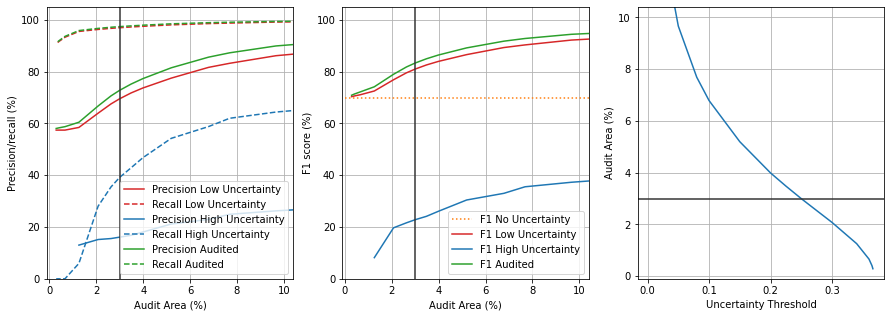

In [ ]:
'''
xlim = [-0.3, 12.7]
xlim = [-0.1, 10.4]

ylim = [0, 105]
'''
manager.plotUncertaintyAA(normalize_xlim=False)

In [ ]:
manager.getOptimalUncertaintyThreshold(bound = 0.0015)

ic| base.py:772 in getOptimalUncertaintyThreshold()
    bounds: (0.0015, 0.3663794801235199)
c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


0.1408715596097929
threshold 0.1408715596097929


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (6677198,)
    predicted_test_classified_incorrect.shape: (6677198,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 6677198
    len(label_mask_current_deforestation_test): 122611381
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 6677198
    len(label_mask_current_deforestation_test): 122611381


[0.7826021  0.98189541 0.76554175 0.05445822 0.21450851 0.55083792
 0.1024091 ]
0.22700792051372695
threshold 0.22700792051372695


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (4219086,)
    predicted_test_classified_incorrect.shape: (4219086,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 4219086
    len(label_mask_current_deforestation_test): 122611381
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 4219086
    len(label_mask_current_deforestation_test): 122611381


[0.71618651 0.97254001 0.82021173 0.03441023 0.16727172 0.42586683
 0.11861149]
0.28024311921958583
threshold 0.28024311921958583


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (2993910,)
    predicted_test_classified_incorrect.shape: (2993910,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2993910
    len(label_mask_current_deforestation_test): 122611381
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2993910
    len(label_mask_current_deforestation_test): 122611381


[0.6644219  0.96624471 0.84527631 0.02441788 0.15318331 0.33259201
 0.11475417]
0.24760409374796982
threshold 0.24760409374796982


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (3728891,)
    predicted_test_classified_incorrect.shape: (3728891,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3728891
    len(label_mask_current_deforestation_test): 122611381
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3728891
    len(label_mask_current_deforestation_test): 122611381


[0.69776182 0.97021865 0.82959155 0.03041227 0.16143428 0.39548737
 0.11962944]
0.2519632961133567
threshold 0.2519632961133567


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (3627880,)
    predicted_test_classified_incorrect.shape: (3627880,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3627880
    len(label_mask_current_deforestation_test): 122611381
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3627880
    len(label_mask_current_deforestation_test): 122611381


[0.69355243 0.96971436 0.83150327 0.02958844 0.16055971 0.38877858
 0.1195035 ]
0.2497943042347343
threshold 0.2497943042347343


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (3678190,)
    predicted_test_classified_incorrect.shape: (3678190,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3678190
    len(label_mask_current_deforestation_test): 122611381
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3678190
    len(label_mask_current_deforestation_test): 122611381


[0.69568232 0.96995757 0.83056072 0.02999876 0.16094719 0.39212666
 0.11958835]
0.24976096719635268
threshold 0.24976096719635268


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (3678988,)
    predicted_test_classified_incorrect.shape: (3678988,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3678988
    len(label_mask_current_deforestation_test): 122611381
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3678988
    len(label_mask_current_deforestation_test): 122611381


[0.69571288 0.96996126 0.83054322 0.03000527 0.16096149 0.39219028
 0.11958802]
0.25020749396751163
threshold 0.25020749396751163


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (3668533,)
    predicted_test_classified_incorrect.shape: (3668533,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3668533
    len(label_mask_current_deforestation_test): 122611381
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3668533
    len(label_mask_current_deforestation_test): 122611381


[0.6952885  0.9699177  0.8307258  0.02992    0.16089555 0.39153759
 0.11958688]
0.24995212866885275
threshold 0.24995212866885275


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (3674506,)
    predicted_test_classified_incorrect.shape: (3674506,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3674506
    len(label_mask_current_deforestation_test): 122611381
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3674506
    len(label_mask_current_deforestation_test): 122611381


[0.69552691 0.96994514 0.83062386 0.02996872 0.16093119 0.39189475
 0.11958555]
0.24982764127311594
threshold 0.24982764127311594


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (3677436,)
    predicted_test_classified_incorrect.shape: (3677436,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3677436
    len(label_mask_current_deforestation_test): 122611381
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3677436
    len(label_mask_current_deforestation_test): 122611381
ic| base.py:776 in getOptimalUncertaintyThreshold()
    self.threshold_optimal: 0.2497943042347343


[0.69565079 0.96995374 0.83057441 0.02999262 0.160942   0.39207911
 0.11958743]


In [ ]:
manager.getUncertaintyMetricsFromOptimalThreshold()

threshold 0.2497943042347343


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (3678190,)
    predicted_test_classified_incorrect.shape: (3678190,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3678190
    len(label_mask_current_deforestation_test): 122611381
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3678190
    len(label_mask_current_deforestation_test): 122611381


[0.69568232 0.96995757 0.83056072 0.02999876 0.16094719 0.39212666
 0.11958835]
threshold 0.2497943042347343
(122611381,) (122611381,)


ic| base.py:805 in getUncertaintyMetricsFromOptimalThreshold()
    self.m_optimal: {'AA': array([0.02999876]),
                     'UEO': array([0.11958835]),
                     'f1': 69.73,
                     'f1_H': array([0.22822154]),
                     'f1_L': array([0.81023796]),
                     'precision_H': array([0.16094719]),
                     'precision_L': array([0.69568232]),
                     'recall_H': array([0.39212666]),
                     'recall_L': array([0.96995757]),
                     'recall_Ltotal': array([0.83056072])}
ic| base.py:806 in getUncertaintyMetricsFromOptimalThreshold()
    self.m_audited_optimal: {'f1': array([0.83357095]),
                             'precision': array([0.72837896]),
                             'recall': array([0.9742751])}


cm_audited [[120819266    477591]
 [    33816   1280708]]
[0.72837896 0.9742751 ]


{'metrics': {'precision_L': array([0.69568232]),
  'recall_L': array([0.96995757]),
  'recall_Ltotal': array([0.83056072]),
  'AA': array([0.02999876]),
  'precision_H': array([0.16094719]),
  'recall_H': array([0.39212666]),
  'UEO': array([0.11958835]),
  'f1_L': array([0.81023796]),
  'f1_H': array([0.22822154]),
  'f1': 69.73},
 'metrics_audited': {'precision': array([0.72837896]),
  'recall': array([0.9742751]),
  'f1': array([0.83357095])},
 'exp': 6}